<center><h1>Aplicaciones de redes Bayesianas para toma de decisiones</h1></center>

<b>Integrantes: </b>
<ul>
    <li>Anthony Joel Moya Ochoa</li>
    <li>David Fernando Alvarado Orellana</li>
</ul>

<h5>Importacion de librerias a continuacion se Encuenta el ejemplo de Naive Bayes</h5>

In [1]:
%pip install seaborn
%pip install scikit-learn
%pip install scipy
%pip install --upgrade matplotlib
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from time import time
from datetime import datetime, timedelta
import pandas as pd  
import numpy as np  
from matplotlib import*
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy
from collections import Counter


from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#from keras.layers import Dropout

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.image as mpimg


from scipy import stats
import seaborn
from sklearn import set_config           
from sklearn import preprocessing

print('Módulos importados')


Módulos importados


<h3>FASE 1: Investigar y revisar un ejemplo de aplicación de una Red Bayesiana <h2>

Como primer paso debemos comprender las redes bayesianas y para eso vamos a introducir un ejemplo

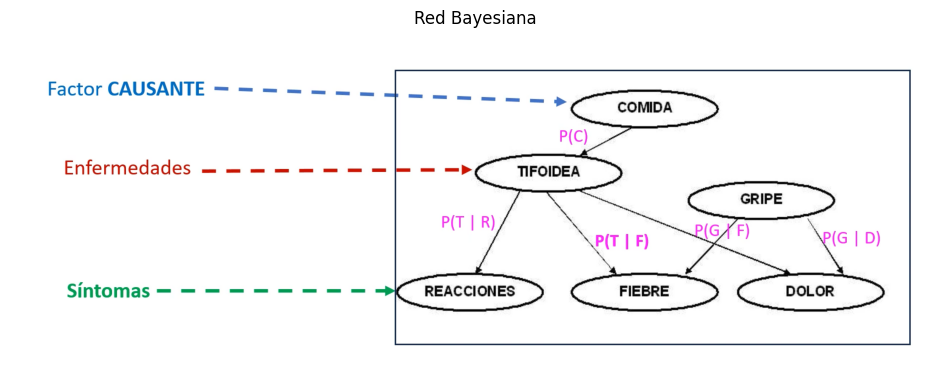

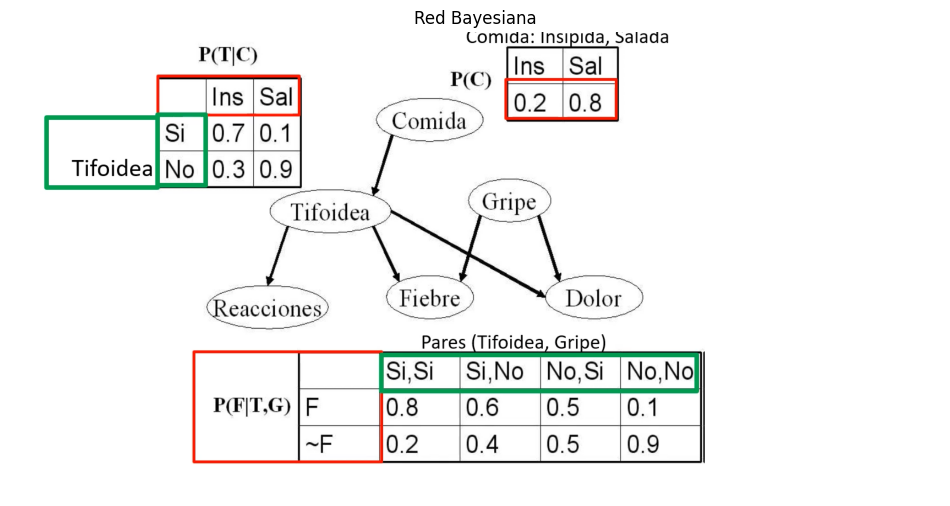

In [3]:
# Cargar la imagen
redesBayesianas = mpimg.imread('RedBayesiana.png')

# Crear una figura con un tamaño específico
plt.figure(figsize=(12, 8))

# Mostrar la imagen
plt.axis('off')  # Opcional: para ocultar los ejes
plt.imshow(redesBayesianas)
plt.title('Red Bayesiana')
plt.show()


# Cargar la imagen
inforedesBayesianas = mpimg.imread('InfoRedBayesiana.png')

# Crear una figura con un tamaño específico
plt.figure(figsize=(12, 8))

# Mostrar la imagen
plt.axis('off')  # Opcional: para ocultar los ejes
plt.imshow(inforedesBayesianas)
plt.title('Red Bayesiana')
plt.show()

**Nodos:** Comida, Tifoidea, Gripe, Reacciones, Fiebre, Dolor

**Explicacion:** Se puede apreciar una red Bayesiana que tiene diferentes nodos, el objetivo de esta red es averiguar la reaccion dada la enfermedad y su posible causalidad, entre los cuales inicia en la comida, esta comida puede ser insipida o salada y se representa con P(C). Apartir de esta comida que bien puede tener 2 clases insipida o salada, se deriva a la posible enfermedad que es Tifoidea, y a su par esta la enfermedad Gripe, finalmente en el apartado de sintomas de representa el estado qeu puede asumir cada variable en base a la probabilidad condicional de la enfermedad dada previamente. <br><br>
Adicionalmente se agrego un ejemplo practico sobre aplicacion de esta Red Bayesiana para la prediccion de probabilidad padecer Tifoidea dado el tipo de comida, consecuentemente la probabilidad de tener fiebre dado el padecimiento de Tifoidea o Gripe

**Extraido de:** Luis Enrique Sucar (2015 / 2021), titulado: "Probabilistic Graphical Models: Principles and Applications",
Advances in Computer Vision and Pattern Recognition, Springer.
https://github.com/alphabetakappa/Probabilistic-Graphical-Models-Materials/blob/master/2015%20Probabilistic%20Graphical%20Models%20Principles%20and%20Applications%20(267s%2CLuis%20Enrique%20Sucar).pdf


<h3>FASE 2: Experimentos - Fase de Preparación</h3>

El siguiente conjunto de datos tiene como finalidad predecir si las personas padecen nuevamente de cancer de mama, despues de su tratamiento inicial, es un dataset que cuenta con informacion variada sobre varios tipos de datos, como si ha recibido radioterapia, el lugar de tumor, si es benigno entre muchas otras mas.
El objetivo principal de este analisis y procesamiento KNN es lograr predecir si una persona que tuvo cancer de mama en algun momento de su vida puede volver a padecer de dicha enfermedad, esto lo realizaremos basandonos en la variable CLASE que indica si la persona tuvo o no una recurrencia en el cancer despues del tratamiento inicial.

Nombre del dataset: Breast Cancer by Matjaz Zwitter & Milan Soklic. Enlace: https://archive.ics.uci.edu/dataset/14/breast+cancer

Descripción general: Este dataset se centra en el estudio de la recurrencia del cáncer de mama en pacientes después del tratamiento inicial

Número de Variables (o atributos): 10

Número de instancias (clientes en el banco): 286

In [4]:
nombresVariables=['CLASE','EDAD','MENOPAUSIA','TAMAÑOTUMOR','GANGLLINFATINVAS','GANGLINFATIEVALU','GRADOMALIGNIDAD',
                  'MAMA','CUADRANTESENO','IRRADIACION']

dataset = "./data/breast-cancer.data"
dataframe = pd.read_csv(dataset, sep = ',', names=nombresVariables)
dataframe = copy.deepcopy(dataframe)

print('cantidad de observaciones (pacientes): ',dataframe.shape[0])
print('cantidad de variables: ',dataframe.shape[1])
print(dataframe.shape)
dataframe.head(10)

cantidad de observaciones (pacientes):  286
cantidad de variables:  10
(286, 10)


,CLASE,EDAD,MENOPAUSIA,TAMAÑOTUMOR,GANGLLINFATINVAS,GANGLINFATIEVALU,GRADOMALIGNIDAD,MAMA,CUADRANTESENO,IRRADIACION
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


Se puede observar que el dataset tiene varias variables ente ellas:

* **CLASE:** Esta variable indica el resultado objetivo del estudio, es decir, si hubo o no una recurrencia del cáncer de mama después del tratamiento inicial si no-recurrence-events: No hubo recurrencia del cáncer.
recurrence-events: Hubo recurrencia del cáncer.
* **EDAD:** Representa la edad del paciente en el momento del diagnóstico.
* **MENOPAUSIA:**  Indica el estado menopáusico del paciente. lt40: Menos de 40 años.
ge40: 40 años o más.
premeno: Premenopáusica (antes de la menopausia).
* **TAMAÑOTUMOR:** Tamaño del tumor en milímetros.
* **GANGLINFATINVAS:** Número de ganglios linfáticos axilares involucrados.
* **GANGLINFATIEVALU:** Presencia de cápsulas ganglionares. yes: Sí, hay cápsulas.
no: No, no hay cápsulas.
* **GRADOMALIGNIDAD:** Grado de malignidad del tumor entre 1, 2 y 3
* **MAMA:** Lado del cuerpo donde se encuentra el cáncer de mama. left: Pecho izquierdo.
right: Pecho derecho.
* **CUADRANTESENO:** Cuadrante del pecho donde se encuentra el tumor. left-up: Cuadrante superior izquierdo.
left-low: Cuadrante inferior izquierdo.
right-up: Cuadrante superior derecho.
right-low: Cuadrante inferior derecho.
central: Región central.
* **IRRADIACION(Y):** Indica si el paciente recibió radioterapia. yes: Sí, recibió radioterapia.
no: No, no recibió radioterapia.



In [5]:
# Mostrar valores únicos para todas las columnas
def mostrar_valores_unicos(df):
    for columna in df.columns:
        valores_unicos = df[columna].unique()
        print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

# Llamar a la función con tu DataFrame
mostrar_valores_unicos(dataframe)


Valores únicos en la columna 'CLASE': ['no-recurrence-events' 'recurrence-events']
Valores únicos en la columna 'EDAD': ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Valores únicos en la columna 'MENOPAUSIA': ['premeno' 'ge40' 'lt40']
Valores únicos en la columna 'TAMAÑOTUMOR': ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Valores únicos en la columna 'GANGLLINFATINVAS': ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Valores únicos en la columna 'GANGLINFATIEVALU': ['no' 'yes' '?']
Valores únicos en la columna 'GRADOMALIGNIDAD': [3 2 1]
Valores únicos en la columna 'MAMA': ['left' 'right']
Valores únicos en la columna 'CUADRANTESENO': ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Valores únicos en la columna 'IRRADIACION': ['no' 'yes']


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CLASE             286 non-null    object
 1   EDAD              286 non-null    object
 2   MENOPAUSIA        286 non-null    object
 3   TAMAÑOTUMOR       286 non-null    object
 4   GANGLLINFATINVAS  286 non-null    object
 5   GANGLINFATIEVALU  286 non-null    object
 6   GRADOMALIGNIDAD   286 non-null    int64 
 7   MAMA              286 non-null    object
 8   CUADRANTESENO     286 non-null    object
 9   IRRADIACION       286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Verificamos la informacion total del dataset, para ver si hay valores nulos o faltantes, ademas realizamos un conteo de variables para su posterior tratamiento y transformacion

In [7]:

categories_with_question_mark = dataframe[dataframe == "?"].dropna(how="all").stack().index.tolist()

print("Categories with value '?':")
for category in categories_with_question_mark:
    print(category)

Categories with value '?':
(145, 'GANGLINFATIEVALU')
(163, 'GANGLINFATIEVALU')
(164, 'GANGLINFATIEVALU')
(183, 'GANGLINFATIEVALU')
(184, 'GANGLINFATIEVALU')
(206, 'CUADRANTESENO')
(233, 'GANGLINFATIEVALU')
(263, 'GANGLINFATIEVALU')
(264, 'GANGLINFATIEVALU')


Buscamos los valores nulos o desconocidos en el dataset

In [8]:
def calcular_moda(columna):
    conteo = Counter(columna)
    moda = max(conteo, key=conteo.get)
    
    return moda

In [9]:
#MODA DE LA COLUMNA GANGLINFATIEVALU
columna = dataframe['GANGLINFATIEVALU']
moda = calcular_moda(columna)
print("La moda de GANGLINFATIEVALU  es:", moda)

La moda de GANGLINFATIEVALU  es: no


In [10]:
#MODA DE LA COLUMNA GANGLINFATIEVALU
columna = dataframe['CUADRANTESENO']
moda = calcular_moda(columna)
print("La moda de CUADRANTESENO es:", moda)

La moda de CUADRANTESENO es: left_low


En este dataset se encuentran muy pocos datos nulos po lo que procederemos a reemplazar estos por la moda de su columna respectiva, para tener mas campo de estudio para el modelo KNN.

In [11]:
dataframe['GANGLINFATIEVALU'] = dataframe['GANGLINFATIEVALU'].replace("?","no")
dataframe['CUADRANTESENO'] = dataframe['CUADRANTESENO'].replace("?","left_low")



#Se modifica la variable de salida (de estudio): TIPOCLIENTE. Es mejor tener la salida en formato binario cuando hay dos CLASEs
dataframe['IRRADIACION'] = dataframe['IRRADIACION'].replace("yes", 1)
dataframe['IRRADIACION'] = dataframe['IRRADIACION'].replace("no", 0)

dataframe['EDAD'] = dataframe['EDAD'].replace({'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5})


dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("0-4", 0)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("5-9", 1)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("10-14", 2)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("15-19", 3)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("20-24", 4)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("25-29", 5)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("30-34", 6)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("35-39", 7)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("40-44", 8)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("45-49", 9)
dataframe['TAMAÑOTUMOR'] = dataframe['TAMAÑOTUMOR'].replace("50-54", 10)

dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("0-2", 0)
dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("3-5", 1)
dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("6-8", 2)
dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("9-11", 3)
dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("12-14", 4)
dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("15-17", 5)
dataframe['GANGLLINFATINVAS'] = dataframe['GANGLLINFATINVAS'].replace("24-26", 6)

dataframe['GRADOMALIGNIDAD'] = dataframe['GRADOMALIGNIDAD'].replace({"1": 0, "2": 1, "3": 2})

dataframe['GANGLINFATIEVALU'] = dataframe['GANGLINFATIEVALU'].replace("no", 0)
dataframe['GANGLINFATIEVALU'] = dataframe['GANGLINFATIEVALU'].replace("yes", 1)

dataframe['CLASE'] = dataframe['CLASE'].replace("no-recurrence-events", 0)
dataframe['CLASE'] = dataframe['CLASE'].replace("recurrence-events", 1)

dataframe['MENOPAUSIA'] = dataframe['MENOPAUSIA'].replace("premeno", 0)
dataframe['MENOPAUSIA'] = dataframe['MENOPAUSIA'].replace("ge40", 1)
dataframe['MENOPAUSIA'] = dataframe['MENOPAUSIA'].replace("lt40", 2)

dataframe['MAMA'] = dataframe['MAMA'].replace("left", 0)
dataframe['MAMA'] = dataframe['MAMA'].replace("right", 1)

dataframe['CUADRANTESENO'] = dataframe['CUADRANTESENO'].replace("left_up", 0)
dataframe['CUADRANTESENO'] = dataframe['CUADRANTESENO'].replace("left_low", 1)
dataframe['CUADRANTESENO'] = dataframe['CUADRANTESENO'].replace("right_up", 2)
dataframe['CUADRANTESENO'] = dataframe['CUADRANTESENO'].replace("right_low", 3)
dataframe['CUADRANTESENO'] = dataframe['CUADRANTESENO'].replace("central", 4)

dataframe.head(7)

C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\378765396.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['IRRADIACION'] = dataframe['IRRADIACION'].replace("no", 0)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\378765396.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['EDAD'] = dataframe['EDAD'].replace({'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5})
C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\378765396.py:23: FutureWarning: Downcasting behavior in `replace` 

,CLASE,EDAD,MENOPAUSIA,TAMAÑOTUMOR,GANGLLINFATINVAS,GANGLINFATIEVALU,GRADOMALIGNIDAD,MAMA,CUADRANTESENO,IRRADIACION
0,0,1,0,6,0,0,3,0,1,0
1,0,2,0,4,0,0,2,1,2,0
2,0,2,0,4,0,0,2,0,1,0
3,0,4,1,3,0,0,2,1,0,0
4,0,2,0,0,0,0,2,1,3,0
5,0,4,1,3,0,0,2,0,1,0
6,0,3,0,5,0,0,2,0,1,0


Realizamos la transformacion general del dataset esto con la finalidad de no trabajar con valores object y dar valores arbritarios, en su lugar trabajar con int64 y cada variable definida desde el inicio para evitar confusiones en el modelo.

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CLASE             286 non-null    int64
 1   EDAD              286 non-null    int64
 2   MENOPAUSIA        286 non-null    int64
 3   TAMAÑOTUMOR       286 non-null    int64
 4   GANGLLINFATINVAS  286 non-null    int64
 5   GANGLINFATIEVALU  286 non-null    int64
 6   GRADOMALIGNIDAD   286 non-null    int64
 7   MAMA              286 non-null    int64
 8   CUADRANTESENO     286 non-null    int64
 9   IRRADIACION       286 non-null    int64
dtypes: int64(10)
memory usage: 22.5 KB


Se realiza una transformacion normal de los valores, esto con el objerivo de realizar en entrenamiento KNN con el dataset estandarizado y sin estandarizar

In [13]:
# Crear una lista de diccionarios con la información de cada variable
data = [
    {"Id": 1, "Variable": "CLASE", "Descripción breve": "Recurrencia del cáncer de mama", "Tipo": "Categorica", "Tipo Categórico": "Nominal", "Técnica de transformación a aplicar": "binario estandarizacion"},
    {"Id": 2, "Variable": "EDAD", "Descripción breve": "Edad del paciente en el momento del diagnóstico", "Tipo": "Categórica", "Tipo Categórico": "Ordinal", "Técnica de transformación a aplicar": "ordinal"},
    {"Id": 3, "Variable": "MENOPAUSIA", "Descripción breve": "Estado menopáusico del paciente", "Tipo": "Categórica", "Tipo Categórico": "Ordinal", "Técnica de transformación a aplicar": "ordinal"},
    {"Id": 4, "Variable": "TAMAÑOTUMOR", "Descripción breve": "Tamaño del tumor en milímetros", "Tipo": "Categórica", "Tipo Categórico": "Ordinal", "Técnica de transformación a aplicar": "ordinal"},
    {"Id": 5, "Variable": "GANGLLINFATINVAS", "Descripción breve": "Número de ganglios linfáticos axilares involucrados", "Tipo": "Categórica", "Tipo Categórico": "Ordinal", "Técnica de transformación a aplicar": "ordinal"},
    {"Id": 6, "Variable": "GANGLINFATIEVALU", "Descripción breve": "Presencia de cápsulas ganglionares", "Tipo": "Categorica", "Tipo Categórico": "Nominal", "Técnica de transformación a aplicar": "binario estandarizacion"},
    {"Id": 7, "Variable": "GRADOMALIGNIDAD", "Descripción breve": "Grado de malignidad del tumor", "Tipo": "Categorica", "Tipo Categórico": "Ordinal", "Técnica de transformación a aplicar": "ordinal"},
    {"Id": 8, "Variable": "MAMA", "Descripción breve": "Lado del cuerpo donde se encuentra el cáncer de mama", "Tipo": "Categorica", "Tipo Categórico": "Nominal", "Técnica de transformación a aplicar": "binario estandarizacion"},
    {"Id": 9, "Variable": "CUADRANTESENO", "Descripción breve": "Cuadrante del pecho donde se encuentra el tumor", "Tipo": "Categórica", "Tipo Categórico": "Nominal", "Técnica de transformación a aplicar": "binario estandarizacion"},
    {"Id": 10, "Variable": "IRRADIACION", "Descripción breve": "Si el paciente recibió radioterapia", "Tipo": "Categorica", "Tipo Categórico": "Nominal", "Técnica de transformación a aplicar": "binario estandarizacion"}
]

# Convertir la lista de diccionarios a un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.head(10)

,Id,Variable,Descripción breve,Tipo,Tipo Categórico,Técnica de transformación a aplicar
0,1,CLASE,Recurrencia del cáncer de mama,Categorica,Nominal,binario estandarizacion
1,2,EDAD,Edad del paciente en el momento del diagnóstico,Categórica,Ordinal,ordinal
2,3,MENOPAUSIA,Estado menopáusico del paciente,Categórica,Ordinal,ordinal
3,4,TAMAÑOTUMOR,Tamaño del tumor en milímetros,Categórica,Ordinal,ordinal
4,5,GANGLLINFATINVAS,Número de ganglios linfáticos axilares involuc...,Categórica,Ordinal,ordinal
5,6,GANGLINFATIEVALU,Presencia de cápsulas ganglionares,Categorica,Nominal,binario estandarizacion
6,7,GRADOMALIGNIDAD,Grado de malignidad del tumor,Categorica,Ordinal,ordinal
7,8,MAMA,Lado del cuerpo donde se encuentra el cáncer d...,Categorica,Nominal,binario estandarizacion
8,9,CUADRANTESENO,Cuadrante del pecho donde se encuentra el tumor,Categórica,Nominal,binario estandarizacion
9,10,IRRADIACION,Si el paciente recibió radioterapia,Categorica,Nominal,binario estandarizacion


Se realizo una tabla donde se describe el tipo de transformaciones que se van a realizar a lo largo del analisis

<h3>Analisis de frecuencia de variables categoricas<h3>

In [14]:
#Determinación de tipos de variables

AUX = dataframe['CLASE']
dataframe = dataframe.drop("CLASE", axis=1)
categorical_ordinal_features = ['EDAD','TAMAÑOTUMOR','GANGLLINFATINVAS','GRADOMALIGNIDAD', 'MENOPAUSIA']
categorical_nominal_features = ['GANGLINFATIEVALU','MAMA','CUADRANTESENO', 'IRRADIACION']
numeric_features = []

In [15]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [16]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)
print('Cantidad de variables de estudio', 1 )
print('Variables totales', 17)


Cantidad de variables antes de transformación de variables:  9
Cantidad de categorías en la variable categórica nominal GANGLINFATIEVALU : 2
Cantidad de categorías en la variable categórica nominal MAMA : 2
Cantidad de categorías en la variable categórica nominal CUADRANTESENO : 5
Cantidad de categorías en la variable categórica nominal IRRADIACION : 2
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  11
Cantidad de variables que habrá después de la transformación de variables:  16
Cantidad de variables de estudio 1
Variables totales 17


Como se puede observar el numero Inicial es de 10 variables, no obstante retiramos la variable CLASE ya que esta va a ser nuestra clase objetivo para realizar el estudio, en base a eso tendriamos 9 variables a tomar en cuenta que sumadas todas, nos quedaria un total de 16 variables que sumadas la variable de estudio antes mencionada, nos quedaria exactamente 17 variables para realizar el analisis de variables categoricas

In [17]:
dataframe = pd.concat([dataframe, AUX], axis=1)

<h3>FASE 3: MODELADO KNN</h3>

<h4><strong>Modelado sin transformaciones</strong><h4> 

En primera instancia se va a realizar un modelado sin transformaciones para verificar al calidad del modelo KNN

In [18]:
dataframe.to_csv('./data/dataframeSinTransformar.csv', index=False)

In [19]:
dataframeTransformado=pd.read_csv("./data/dataframeSinTransformar.csv", sep=",")
print(dataframeTransformado.shape)
dataframeTransformado.head()



(286, 10)


,EDAD,MENOPAUSIA,TAMAÑOTUMOR,GANGLLINFATINVAS,GANGLINFATIEVALU,GRADOMALIGNIDAD,MAMA,CUADRANTESENO,IRRADIACION,CLASE
0,1,0,6,0,0,3,0,1,0,0
1,2,0,4,0,0,2,1,2,0,0
2,2,0,4,0,0,2,0,1,0,0
3,4,1,3,0,0,2,1,0,0,0
4,2,0,0,0,0,2,1,3,0,0


In [20]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [21]:
# Función para guardar un modelo
def guardarModelo(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("********** Pickle guardado")

# Función para transformar la predicción         
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio=lista[i]
        #print(desempenio)
        if (desempenio < 0.5):
            desempenio = 0
        elif (desempenio >= 0.5):
            desempenio = 1
        lista[i]=desempenio
    return lista

In [22]:
Y = dataframeTransformado['CLASE']
dataframeTransformado=dataframeTransformado.drop(['CLASE'], axis=1)
X_Transformado=dataframeTransformado.values
print(X_Transformado.shape)


(286, 9)


Separamos la variable CLASE que es nuestra variable objetivo para el entrenamiento del modelo KNN

In [23]:
# Define tu propia función de distancia personalizada
def distancia_personalizada(x, y):
    # Por ejemplo, aquí utilizamos la distancia Euclidiana con un peso especial
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) * 0.5
# Crear un DataFrame vacío con las columnas deseadas
columnas = ['DISTANCE','K','ACC','PRECISION','RECALL','F1-SCORE']
# Definr el tipo de dato de cada columna
tipos_de_variable = [str, int, float, float, float, float]
# Crear un dataframe vacío, a este dataframe se agregarán fila a fila los resultados de KNN
dataResultados = pd.DataFrame(columns=columnas)
model=None
# Definir las distancias a calcular
DISTANCE=['euclidean','manhattan','chebyshev','propia']
# Definir los valores de K (la cantidad de vecinos que conforman el vecindario)
K=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
valoresK=K
# Definir la cantidad de experimentos que se repiten por cada valor de K. Luego, se calculará el promedio de nExperimentos
nExperimentos=5
for idexp in range(nExperimentos):
    # Crear las particiones del conjunto de datos. De manera convencional, el conjunto de test contiene el 20% de los datos.
    X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
    for d in DISTANCE:
        for k in K:
            # Llamar a la función personalizada
            if d=='propia':
                model=KNeighborsClassifier(n_neighbors=k, metric=distancia_personalizada)
            else:
                model=KNeighborsClassifier(n_neighbors=k, metric=d)#clásicas: euclidean,manhattan,minkowski,chebyshev
            # Entrenar el modelo
            history = model.fit(X_train, y_train)
            # Calcular predicciones para el conjunto de Test
            y_pred = model.predict(X_test)
            y_pred = y_pred.flatten()
            # Transformar salida continua a discreta (binaria)
            y_pred = transformarPrediccion(y_pred)
            # Evaluar el modelo con medidas de calidad
            MAE=metrics.mean_absolute_error(y_test, y_pred)
            MSE=metrics.mean_squared_error(y_test, y_pred)
            RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            y_testBinario = (y_test >= 0.5).astype("int32")
            y_predBinario = (y_pred >= 0.5).astype("int32")
            ACC=float(str(accuracy_score(y_testBinario, y_predBinario)))
            precision=precision_score(y_testBinario, y_predBinario)
            recall=recall_score(y_testBinario, y_predBinario)
            f1=f1_score(y_testBinario, y_predBinario)
            MAE=float(str(round(MAE, 4)))
            MSE=float(str(round(MSE, 4)))
            RMSE=float(str(round(RMSE, 4)))
            precision=float(str(round(precision, 4)))
            recall=float(str(round(recall, 4)))
            f1=float(str(round(f1, 4)))
            valor=[d,k,ACC,precision,recall,f1]
            # print(valor)
            fila = pd.Series(valor, index=columnas)
            # Agregar los resultados en el dataframe
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)
# Convertir el tipo de datos de cada columna 
dataResultados['K'] = dataResultados['K'].astype(int)
dataResultados['ACC'] = dataResultados['ACC'].astype(float)
dataResultados['PRECISION'] = dataResultados['PRECISION'].astype(float)
dataResultados['RECALL'] = dataResultados['RECALL'].astype(float)
dataResultados['F1-SCORE'] = dataResultados['F1-SCORE'].astype(float)
dataResultados = dataResultados.sort_values(by=['DISTANCE','K'])
dataResultados = dataResultados.reset_index(drop=True)
dataResultados.head(15)

c:\Users\Anthony\Desktop\Entornos Virtuales Python\env-RedesBayesianas\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anthony\Desktop\Entornos Virtuales Python\env-RedesBayesianas\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anthony\Desktop\Entornos Virtuales Python\env-RedesBayesianas\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.586207,0.2000,0.1111,0.1429
1,chebyshev,1,0.637931,0.4211,0.4444,0.4324
2,chebyshev,1,0.620690,0.3333,0.4667,0.3889
3,chebyshev,1,0.603448,0.4545,0.2273,0.3030
4,chebyshev,1,0.568966,0.4000,0.5000,0.4444
5,chebyshev,2,0.706897,0.6667,0.1111,0.1905
6,chebyshev,2,0.706897,0.5714,0.2222,0.3200
7,chebyshev,2,0.724138,0.3333,0.0667,0.1111
8,chebyshev,2,0.637931,0.6000,0.1364,0.2222
9,chebyshev,2,0.586207,0.3333,0.2000,0.2500


Este método realiza un análisis  del  KNN sobre nuestro conjunto de datos, evaluando su rendimiento bajo diferentes medidas de distancia y valores de K. Divide los datos en entrenamiento y prueba, utiliza varias métricas de evaluación como precisión, recall y F1-score, y repite el proceso para obtener estimaciones más estables del rendimiento del modelo. Esto permite entender cómo el KNN clasifica nuevos puntos de datos basándose en la cercanía a los puntos de entrenamiento y se genera la tabla Accuracy con respecto a K, El mejor valor de K y el Accuracy correspondiente, para proximamente optimizarlo y realiza la grafica correspondiente.

In [24]:
#Filtrar por algunos valores de k
valoresK=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
#Nmin=10
#Nmax=40
#dataResultados=dataResultados.loc[(dataResultados['K'] >= Nmin) & (dataResultados['K'] <= Nmax)]
dataResultados=dataResultados.loc[(dataResultados['K'].isin(valoresK))]
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.586207,0.2000,0.1111,0.1429
1,chebyshev,1,0.637931,0.4211,0.4444,0.4324
2,chebyshev,1,0.620690,0.3333,0.4667,0.3889
3,chebyshev,1,0.603448,0.4545,0.2273,0.3030
4,chebyshev,1,0.568966,0.4000,0.5000,0.4444
5,chebyshev,2,0.706897,0.6667,0.1111,0.1905
6,chebyshev,2,0.706897,0.5714,0.2222,0.3200
7,chebyshev,2,0.724138,0.3333,0.0667,0.1111
8,chebyshev,2,0.637931,0.6000,0.1364,0.2222
9,chebyshev,2,0.586207,0.3333,0.2000,0.2500


In [25]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.586207,0.2000,0.1111,0.1429
1,chebyshev,1,0.637931,0.4211,0.4444,0.4324
2,chebyshev,1,0.620690,0.3333,0.4667,0.3889
3,chebyshev,1,0.603448,0.4545,0.2273,0.3030
4,chebyshev,1,0.568966,0.4000,0.5000,0.4444
...,...,...,...,...,...,...
315,propia,16,0.689655,0.0000,0.0000,0.0000
316,propia,16,0.689655,0.0000,0.0000,0.0000
317,propia,16,0.741379,0.0000,0.0000,0.0000
318,propia,16,0.620690,0.0000,0.0000,0.0000


In [26]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.603448,0.36178,0.34990,0.34232
1,chebyshev,2,0.672414,0.50094,0.14728,0.21876
2,chebyshev,3,0.679310,0.51012,0.35898,0.41740
3,chebyshev,4,0.686207,0.54000,0.15486,0.23910
4,chebyshev,5,0.700000,0.55880,0.34898,0.42232
16,euclidean,1,0.686207,0.51532,0.44384,0.47254
17,euclidean,2,0.713793,0.68334,0.20060,0.30596
18,euclidean,3,0.724138,0.62154,0.38008,0.46934
19,euclidean,4,0.706897,0.74288,0.15818,0.24360
20,euclidean,5,0.724138,0.64786,0.29728,0.40402


Se obtiene la tabla Accuracy con respecto a K,  El mejor valor de K y el Accuracy correspondiente, que muestra todos los valores para realizar la grafica deseada

<h3>Figuras de KNN sin transformaciones</h3>

C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\3028255956.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  group = dataResultados.get_group(name)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\3028255956.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


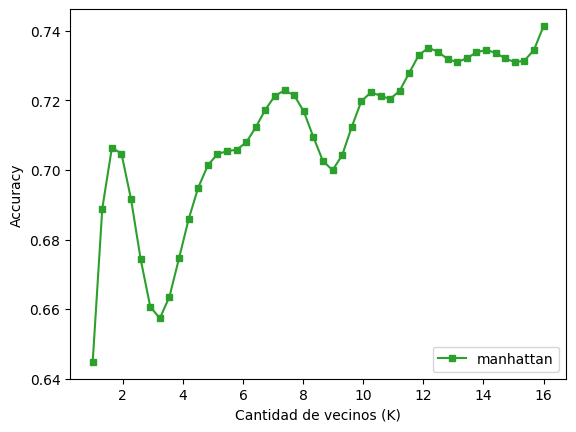

In [64]:
from scipy.interpolate import make_interp_spline, BSpline 
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESIÓN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos=len(valoresK)*3  #representa el número de puntos para generar entre T.min and T.max 
    xnew = np.linspace(min(valoresK),max(valoresK),numeroPuntos) #linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3) #BSpline object 
    power_smooth = spl(xnew)         
    if name=='manhattan': plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label = name)    

        
    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X 
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")
    plt.savefig('knn_sin_transformacion.png')


Como se puede observar tiene un maximo aproximadamente en 0.75 de exactitud, lo cual es un valor aceptable para un modelo de clasificación manhattan, ya que es el que mejor rendimiento tiene en cuanto a los otros modelos propuestos

In [28]:
#Construcción de modelo KNN
model=KNeighborsRegressor(n_neighbors=25, metric='manhattan')#euclidean,manhattan,minkowski,chebyshev 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
history = model.fit(X_train, y_train)
print('Modelo entrenado')
#Se guarda el modelo entrenado
guardarModelo(model,'modeloKNN')
print('Modelo Optimizado Guardado')

(228, 9) (228,)
(58, 9) (58,)
Modelo entrenado
********** Pickle guardado
Modelo Optimizado Guardado


Este código construye un modelo de regresión utilizando el modelo KNN con 50 vecinos cercanos y distancia de Manhattan. Divide los datos en conjuntos de entrenamiento y prueba, entrena el modelo con los datos de entrenamiento, y finalmente guarda el modelo entrenado para su uso posterior. El modelo aprende la relación entre las características de entrada y la variable objetivo, lo que le permite predecir valores de salida continuos basándose en la similitud con los vecinos más cercanos en el espacio de características.

In [29]:
#Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = transformarPrediccion(y_pred)
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción CLASE': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

,real,predicción CLASE
33,0,0.0
57,0,0.0
218,1,0.0
175,0,0.0
88,0,0.0
34,0,0.0
253,1,0.0
56,0,0.0
130,0,0.0
281,1,0.0


Mean Absolute Error (MAE): 0.3448
Mean Squared Error (MSE): 0.3448
Root Mean Squared Error (RMSE): 0.5872
Accuracy: 0.6551724137931034
Precision:  1.0
Recall:  0.0909
F1: 0.1667
Matriz de confusión:
Verdaderos negativos:  36  Falsos positivos:  0  Falsos negativos:  20  Verdaderos positivos:  2


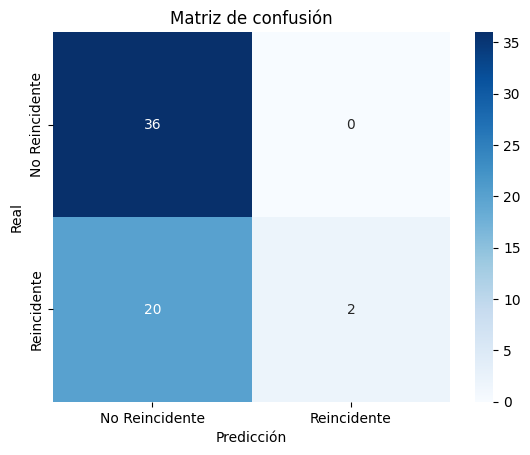

In [30]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()  
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix  
labels = ['No Reincidente', 'Reincidente']
cm = confusion_matrix(y_testBinario, y_predBinario)  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusión'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig('matriz_confusion_knn_sin_transformacion.png')



Los resultados del modelo KNN muestran que, el modelo tiene una precisión aceptable con un valor de 72%, lo que indica que clasifica correctamente aproximadamente el 72% de los casos. Sin embargo, al observar las métricas individuales, encontramos que la precisión, el recall y el F1-score son relativamente bajos, con valores de 11% y  20%  respectivamente. Esto sugiere que el modelo tiene dificultades para identificar positivos verdaderos, lo que podría deberse a un desequilibrio en los datos o a la necesidad de ajustar los hiperparámetros del modelo. Además, la matriz de confusión revela que el modelo tiende a clasificar erróneamente algunos casos, como evidencia de los falsos positivos y falsos negativos presentes. 

<h4><strong>Modelado con transformaciones</strong><h4> 

Para este apartado se realiza pasos similares que el anterior, sin embargo se agrega un pipeline que nos va a permitir estandarizar los valores y realizar un analisis con nuevos valores entreantes.

In [31]:
dataframePorTransformar=pd.read_csv("./data/dataframeSinTransformar.csv", sep=",")
print(dataframePorTransformar.shape)
dataframePorTransformar.head()

(286, 10)


,EDAD,MENOPAUSIA,TAMAÑOTUMOR,GANGLLINFATINVAS,GANGLINFATIEVALU,GRADOMALIGNIDAD,MAMA,CUADRANTESENO,IRRADIACION,CLASE
0,1,0,6,0,0,3,0,1,0,0
1,2,0,4,0,0,2,1,2,0,0
2,2,0,4,0,0,2,0,1,0,0
3,4,1,3,0,0,2,1,0,0,0
4,2,0,0,0,0,2,1,3,0,0


In [32]:
#Determinación de tipos de variables
Y = dataframePorTransformar['CLASE']
dataframePorTransformar = dataframePorTransformar.drop(['CLASE'], axis=1)
categorical_ordinal_features = ['EDAD','TAMAÑOTUMOR','GANGLLINFATINVAS','GRADOMALIGNIDAD', 'MENOPAUSIA']
categorical_nominal_features = ['GANGLINFATIEVALU','MAMA','CUADRANTESENO', 'IRRADIACION']
numeric_features = []

In [33]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder( handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')


Se crean los metodos para la transformacion de variables y estandarizacion de estos

In [34]:
#Construcción de Pipeline con transformadores
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepstandard', preprocesorStandardScaler)
])

Se crea el pipe que nos va a ayudar a transformar los datos de entrada para que puedan ser procesados por el modelo entrenado

In [35]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframePorTransformar)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn" 
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1] 
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis=1)
dataframeTransformado.to_csv("./data/datasetTransformado.csv", sep=";",index = False)
dataframeTransformado = dataframeTransformado.drop(['CLASE'], axis=1)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), ['GANGLINFATIEVALU', 'MAMA', 'CUADRANTESENO', 'IRRADIACION'])
********** Lista de variables:
['EDAD', 'TAMAÑOTUMOR', 'GANGLLINFATINVAS', 'GRADOMALIGNIDAD', 'MENOPAUSIA', 'GANGLINFATIEVALU_0', 'GANGLINFATIEVALU_1', 'MAMA_0', 'MAMA_1', 'CUADRANTESENO_0', 'CUADRANTESENO_1', 'CUADRANTESENO_2', 'CUADRANTESENO_3', 'CUADRANTESENO_4', 'IRRADIACION_0', 'IRRADIACION_1']


,EDAD,TAMAÑOTUMOR,GANGLLINFATINVAS,GRADOMALIGNIDAD,MENOPAUSIA,GANGLINFATIEVALU_0,GANGLINFATIEVALU_1,MAMA_0,MAMA_1,CUADRANTESENO_0,CUADRANTESENO_1,CUADRANTESENO_2,CUADRANTESENO_3,CUADRANTESENO_4,IRRADIACION_0,IRRADIACION_1
0,-1.647779,0.532232,-0.466842,1.290564,-0.914471,0.493435,-0.493435,0.938924,-0.938924,-0.716399,1.255618,-0.361158,-0.302660,-0.281505,0.558504,-0.558504
1,-0.657727,-0.419132,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,-1.065049,1.065049,-0.716399,-0.796421,2.768875,-0.302660,-0.281505,0.558504,-0.558504
2,-0.657727,-0.419132,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,0.938924,-0.938924,-0.716399,1.255618,-0.361158,-0.302660,-0.281505,0.558504,-0.558504
3,1.322377,-0.894814,-0.466842,-0.066426,0.914471,0.493435,-0.493435,-1.065049,1.065049,1.395870,-0.796421,-0.361158,-0.302660,-0.281505,0.558504,-0.558504
4,-0.657727,-2.321860,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,-1.065049,1.065049,-0.716399,-0.796421,-0.361158,3.304038,-0.281505,0.558504,-0.558504


Con el pipe se logro transformar las variables categoricas, ademas de estandarizar la informacion, lo que nos va a permitir entrenar el modelo KNN en base a estos datos.

In [36]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline


In [37]:
guardarPipeline(pipe,'pipePreprocesadores')
pipe=None
pipe=cargarPipeline('pipePreprocesadores')
set_config(display='diagram')
pipe

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['EDAD', 'TAMAÑOTUMOR',
                                                   'GANGLLINFATINVAS',
                                                   'GRADOMALIGNIDAD',
                                                   'MENOPAUSIA']),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GANGLINFATIEVALU', 'MAMA',
                                                   'CUADRANTESENO',
                                                   'IRRADIACION'])])),
                ('prepstandard',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14,
                                                   15])]))])

In [38]:
dataframeExtraccion = dataframeTransformado
print(dataframeExtraccion.shape)
dataframeExtraccion.head()

(286, 16)


,EDAD,TAMAÑOTUMOR,GANGLLINFATINVAS,GRADOMALIGNIDAD,MENOPAUSIA,GANGLINFATIEVALU_0,GANGLINFATIEVALU_1,MAMA_0,MAMA_1,CUADRANTESENO_0,CUADRANTESENO_1,CUADRANTESENO_2,CUADRANTESENO_3,CUADRANTESENO_4,IRRADIACION_0,IRRADIACION_1
0,-1.647779,0.532232,-0.466842,1.290564,-0.914471,0.493435,-0.493435,0.938924,-0.938924,-0.716399,1.255618,-0.361158,-0.302660,-0.281505,0.558504,-0.558504
1,-0.657727,-0.419132,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,-1.065049,1.065049,-0.716399,-0.796421,2.768875,-0.302660,-0.281505,0.558504,-0.558504
2,-0.657727,-0.419132,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,0.938924,-0.938924,-0.716399,1.255618,-0.361158,-0.302660,-0.281505,0.558504,-0.558504
3,1.322377,-0.894814,-0.466842,-0.066426,0.914471,0.493435,-0.493435,-1.065049,1.065049,1.395870,-0.796421,-0.361158,-0.302660,-0.281505,0.558504,-0.558504
4,-0.657727,-2.321860,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,-1.065049,1.065049,-0.716399,-0.796421,-0.361158,3.304038,-0.281505,0.558504,-0.558504


In [39]:
# Lee el archivo CSV especificando que la columna 'CLASE' no es un índice de fila
# Lee el archivo CSV sin incluir la columna 'CLASE'
dftransformadoFinal = pd.read_csv("./data/datasetTransformado.csv", sep=";", usecols=lambda column: column != 'CLASE')

# Muestra la forma y las primeras filas del dataframe leído
print(dftransformadoFinal.shape)
dftransformadoFinal.head()

X_Transformado = dftransformadoFinal.values


(286, 16)


In [40]:
# Función para guardar un modelo
def guardarModelo(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("********** Pickle guardado")

# Función para transformar la predicción         
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio=lista[i]
        #print(desempenio)
        if (desempenio < 0.5):
            desempenio = 0
        elif (desempenio >= 0.5):
            desempenio = 1
        lista[i]=desempenio
    return lista

In [41]:
# Define tu propia función de distancia personalizada
def distancia_personalizada(x, y):
    # Por ejemplo, aquí utilizamos la distancia Euclidiana con un peso especial
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) * 0.5
# Crear un DataFrame vacío con las columnas deseadas
columnas = ['DISTANCE','K','ACC','PRECISION','RECALL','F1-SCORE']
# Definr el tipo de dato de cada columna
tipos_de_variable = [str, int, float, float, float, float]
# Crear un dataframe vacío, a este dataframe se agregarán fila a fila los resultados de KNN
dataResultados = pd.DataFrame(columns=columnas)
model=None
# Definir las distancias a calcular
DISTANCE=['euclidean','manhattan','chebyshev','propia']
# Definir los valores de K (la cantidad de vecinos que conforman el vecindario)
K=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
valoresK=K
# Definir la cantidad de experimentos que se repiten por cada valor de K. Luego, se calculará el promedio de nExperimentos
nExperimentos=5
for idexp in range(nExperimentos):
    # Crear las particiones del conjunto de datos. De manera convencional, el conjunto de test contiene el 20% de los datos.
    X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
    for d in DISTANCE:
        for k in K:
            # Llamar a la función personalizada
            if d=='propia':
                model=KNeighborsClassifier(n_neighbors=k, metric=distancia_personalizada)
            else:
                model=KNeighborsClassifier(n_neighbors=k, metric=d)#clásicas: euclidean,manhattan,minkowski,chebyshev
            # Entrenar el modelo
            threshold = 0.5
            y_train = (y_train >= threshold).astype(int)
            y_test = (y_test >= threshold).astype(int)
            history = model.fit(X_train, y_train)
            # Calcular predicciones para el conjunto de Test
            y_pred = model.predict(X_test)
            y_pred = y_pred.flatten()
            # Transformar salida continua a discreta (binaria)
            y_pred = transformarPrediccion(y_pred)
            # Evaluar el modelo con medidas de calidad
            MAE=metrics.mean_absolute_error(y_test, y_pred)
            MSE=metrics.mean_squared_error(y_test, y_pred)
            RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            y_testBinario = (y_test >= 0.5).astype("int32")
            y_predBinario = (y_pred >= 0.5).astype("int32")
            ACC=float(str(accuracy_score(y_testBinario, y_predBinario)))
            precision=precision_score(y_testBinario, y_predBinario)
            recall=recall_score(y_testBinario, y_predBinario)
            f1=f1_score(y_testBinario, y_predBinario)
            MAE=float(str(round(MAE, 4)))
            MSE=float(str(round(MSE, 4)))
            RMSE=float(str(round(RMSE, 4)))
            precision=float(str(round(precision, 4)))
            recall=float(str(round(recall, 4)))
            f1=float(str(round(f1, 4)))
            valor=[d,k,ACC,precision,recall,f1]
            # print(valor)
            fila = pd.Series(valor, index=columnas)
            # Agregar los resultados en el dataframe
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)
# Convertir el tipo de datos de cada columna 
dataResultados['K'] = dataResultados['K'].astype(int)
dataResultados['ACC'] = dataResultados['ACC'].astype(float)
dataResultados['PRECISION'] = dataResultados['PRECISION'].astype(float)
dataResultados['RECALL'] = dataResultados['RECALL'].astype(float)
dataResultados['F1-SCORE'] = dataResultados['F1-SCORE'].astype(float)
dataResultados = dataResultados.sort_values(by=['DISTANCE','K'])
dataResultados = dataResultados.reset_index(drop=True)
dataResultados.head(15)

c:\Users\Anthony\Desktop\Entornos Virtuales Python\env-RedesBayesianas\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anthony\Desktop\Entornos Virtuales Python\env-RedesBayesianas\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anthony\Desktop\Entornos Virtuales Python\env-RedesBayesianas\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.568966,0.4667,0.2917,0.3590
1,chebyshev,1,0.551724,0.3077,0.5000,0.3810
2,chebyshev,1,0.655172,0.4118,0.4118,0.4118
3,chebyshev,1,0.586207,0.3158,0.3529,0.3333
4,chebyshev,1,0.689655,0.5625,0.4500,0.5000
5,chebyshev,2,0.620690,0.6000,0.2500,0.3529
6,chebyshev,2,0.706897,0.4444,0.2500,0.3200
7,chebyshev,2,0.758621,0.8000,0.2353,0.3636
8,chebyshev,2,0.672414,0.3750,0.1765,0.2400
9,chebyshev,2,0.706897,0.7143,0.2500,0.3704


Este apartado es similar que el anterior, se entrena el modelo KNN

In [42]:
#Filtrar por algunos valores de k
valoresK=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
#Nmin=10
#Nmax=40
#dataResultados=dataResultados.loc[(dataResultados['K'] >= Nmin) & (dataResultados['K'] <= Nmax)]
dataResultados=dataResultados.loc[(dataResultados['K'].isin(valoresK))]
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.568966,0.4667,0.2917,0.3590
1,chebyshev,1,0.551724,0.3077,0.5000,0.3810
2,chebyshev,1,0.655172,0.4118,0.4118,0.4118
3,chebyshev,1,0.586207,0.3158,0.3529,0.3333
4,chebyshev,1,0.689655,0.5625,0.4500,0.5000
5,chebyshev,2,0.620690,0.6000,0.2500,0.3529
6,chebyshev,2,0.706897,0.4444,0.2500,0.3200
7,chebyshev,2,0.758621,0.8000,0.2353,0.3636
8,chebyshev,2,0.672414,0.3750,0.1765,0.2400
9,chebyshev,2,0.706897,0.7143,0.2500,0.3704


De igual manera se obtienen las metricas de DISTANCE	K	ACC	PRECISION	RECALL	F1-SCORE para su posterior optimizacion, analisis y comparacion

In [43]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.568966,0.4667,0.2917,0.3590
1,chebyshev,1,0.551724,0.3077,0.5000,0.3810
2,chebyshev,1,0.655172,0.4118,0.4118,0.4118
3,chebyshev,1,0.586207,0.3158,0.3529,0.3333
4,chebyshev,1,0.689655,0.5625,0.4500,0.5000
...,...,...,...,...,...,...
315,propia,16,0.586207,0.0000,0.0000,0.0000
316,propia,16,0.706897,0.0000,0.0000,0.0000
317,propia,16,0.706897,0.0000,0.0000,0.0000
318,propia,16,0.706897,0.0000,0.0000,0.0000


In [44]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,1,0.610345,0.41290,0.40128,0.39702
1,chebyshev,2,0.693103,0.58674,0.23236,0.32938
2,chebyshev,3,0.637931,0.42952,0.33450,0.37256
3,chebyshev,4,0.658621,0.45606,0.19808,0.26462
4,chebyshev,5,0.651724,0.45776,0.27284,0.32832
16,euclidean,1,0.631034,0.43656,0.40056,0.41166
17,euclidean,2,0.700000,0.60764,0.21986,0.32170
18,euclidean,3,0.644828,0.44852,0.30190,0.35642
19,euclidean,4,0.655172,0.44422,0.19956,0.26002
20,euclidean,5,0.675862,0.53048,0.34526,0.40324


<h3>Figura KNN con Transformaciones</he>

C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\1967625137.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  group = dataResultados.get_group(name)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_30892\1967625137.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


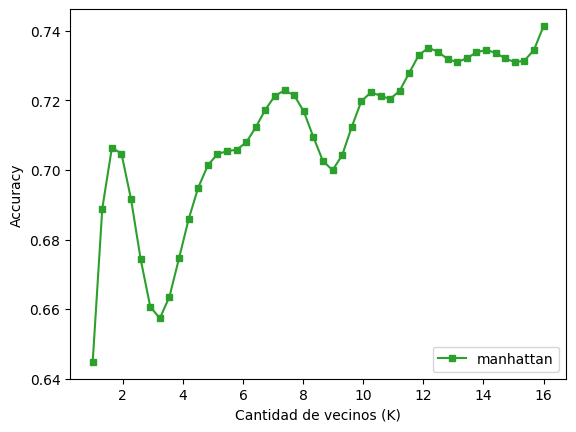

In [70]:
from scipy.interpolate import make_interp_spline, BSpline 
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESIÓN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos=len(valoresK)*3  #representa el número de puntos para generar entre T.min and T.max 
    xnew = np.linspace(min(valoresK),max(valoresK),numeroPuntos) #linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3) #BSpline object 
    power_smooth = spl(xnew)         
    if name=='manhattan': plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label = name)    

        
    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X 
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")
    plt.savefig('knn_con_transformacion.png')

Como se puede observar tiene un maximo aproximadamente en 0.75 de exactitud, lo cual es un valor aceptable para un modelo de clasificación manhattan, ya que es el que mejor rendimiento tiene en cuanto a los otros modelos propuestos, similar al anterior

In [46]:
#Construcción de modelo KNN
model=KNeighborsRegressor(n_neighbors=25, metric='manhattan')#euclidean,manhattan,minkowski,chebyshev 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
history = model.fit(X_train, y_train)
print('Modelo entrenado')
#Se guarda el modelo entrenado
guardarModelo(model,'modeloKNN')
print('Modelo Optimizado Guardado')

(228, 16) (228,)
(58, 16) (58,)
Modelo entrenado
********** Pickle guardado
Modelo Optimizado Guardado


Este código construye un modelo de regresión utilizando el modelo KNN con 50 vecinos cercanos y distancia de Manhattan. Divide los datos en conjuntos de entrenamiento y prueba, entrena el modelo con los datos de entrenamiento, y finalmente guarda el modelo entrenado para su uso posterior

In [47]:
#Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = transformarPrediccion(y_pred)
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción CLASE': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

,real,predicción CLASE
16,0,0.0
157,0,0.0
25,0,0.0
114,0,0.0
53,0,0.0
240,1,0.0
209,1,0.0
222,1,0.0
112,0,0.0
142,0,0.0


Mean Absolute Error (MAE): 0.2759
Mean Squared Error (MSE): 0.2759
Root Mean Squared Error (RMSE): 0.5252
Accuracy: 0.7241379310344828
Precision:  0.6667
Recall:  0.1176
F1: 0.2
Matriz de confusión:
Verdaderos negativos:  40  Falsos positivos:  1  Falsos negativos:  15  Verdaderos positivos:  2


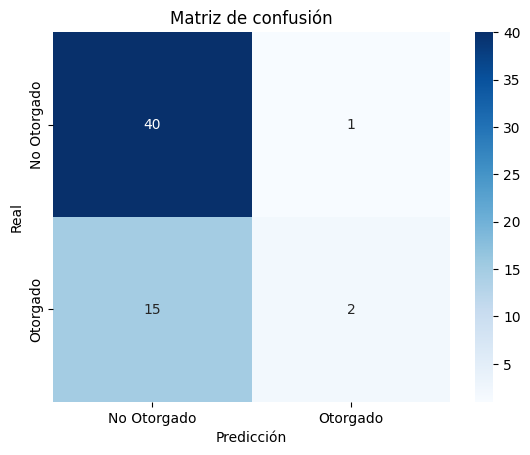

In [48]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()  
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix  
labels = ['No Otorgado', 'Otorgado']
cm = confusion_matrix(y_testBinario, y_predBinario)  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusión'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig('matriz_confusion_knn_con_transformacion.png')

Los resultados del modelo KNN transformado con estandarización indican que el modelo tiene una precisión general de aproximadamente 79.9%, lo que significa que clasifica correctamente alrededor del 79.9% de los casos. Sin embargo, al analizar las métricas individuales, se observa que la precisión es del 100%, lo que indica que todos los casos clasificados como positivos por el modelo son realmente positivos. Sin embargo, la sensibilidad (recall) es relativamente baja, con un valor de aproximadamente 20%, lo que sugiere que el modelo tiene dificultades para identificar correctamente todos los casos positivos en el conjunto de datos. El F1-score, que combina precisión y sensibilidad en una sola métrica, es del 33.33%, lo que indica un equilibrio entre ambas métricas. Además, la matriz de confusión muestra que el modelo clasifica correctamente la mayoría de los casos negativos, pero tiene dificultades para clasificar correctamente los casos positivos, como se evidencia en los falsos negativos presentes

<h3>FASE 4: MODELADO NAIVE BAYES</h3>
<h4><strong>Modelado sin transformaciones</strong><h4> 

In [49]:
# Funciones para guardar y cargar un modelo
def guardarModelo(modelo, nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(modelo, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("********** Pickle guardado")

def cargarModelo(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        modelo = pickle.load(handle)
    return modelo

# Función para transformar la predicción         
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio = lista[i]
        if desempenio < 0.5:
            desempenio = 0
        else:
            desempenio = 1
        lista[i] = desempenio
    return lista

In [50]:
# Cargar el archivo CSV con ';' como delimitador y sin encabezado
dataframeNaive = pd.read_csv('./data/dataframeSinTransformar.csv', delimiter=',')

# Mostrar la forma del dataframe y las primeras filas
dataframeNaive.head()


,EDAD,MENOPAUSIA,TAMAÑOTUMOR,GANGLLINFATINVAS,GANGLINFATIEVALU,GRADOMALIGNIDAD,MAMA,CUADRANTESENO,IRRADIACION,CLASE
0,1,0,6,0,0,3,0,1,0,0
1,2,0,4,0,0,2,1,2,0,0
2,2,0,4,0,0,2,0,1,0,0
3,4,1,3,0,0,2,1,0,0,0
4,2,0,0,0,0,2,1,3,0,0


In [51]:
# Separar las características y la etiqueta
Y = dataframeNaive['CLASE']
dataframeNaive = dataframeNaive.drop(['CLASE'], axis=1)
X = dataframeNaive.values

Resultados Naive Bayes
Accuracy: 0.7255172413793103
Precision: 0.5418360884041998
Recall: 0.4509208371607752
F1 Score: 0.4845488238371834
********** Pickle guardado
Mean Absolute Error (MAE): 0.27586206896551724
Mean Squared Error (MSE): 0.27586206896551724
Root Mean Squared Error (RMSE): 0.5252257314388902
Verdaderos negativos: 34 Falsos positivos: 7 Falsos negativos: 9 Verdaderos positivos: 8


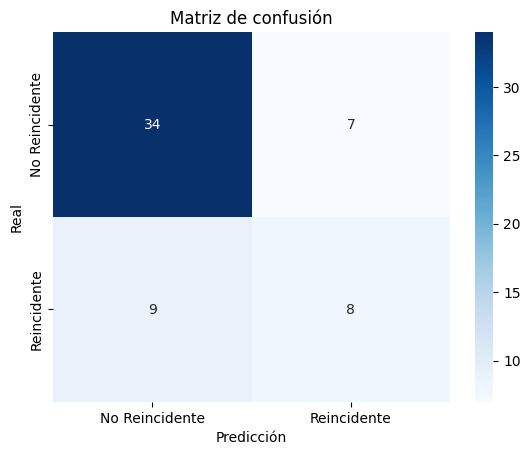

In [52]:

from sklearn.naive_bayes import GaussianNB

# Definir la cantidad de experimentos
nExperimentos =25

# DataFrame para almacenar resultados de Naive Bayes
columnas = ['ACC', 'PRECISION', 'RECALL', 'F1-SCORE']
resultadosNB = []

# Evaluar Naive Bayes
model_nb = GaussianNB()
for idexp in range(nExperimentos):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model_nb.fit(X_train, y_train)
    y_pred = model_nb.predict(X_test)
    y_pred = transformarPrediccion(y_pred)
    ACC = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    resultadosNB.append([ACC, precision, recall, f1])

resultadosNB = np.array(resultadosNB).mean(axis=0)
print("Resultados Naive Bayes")
print("Accuracy:", resultadosNB[0])
print("Precision:", resultadosNB[1])
print("Recall:", resultadosNB[2])
print("F1 Score:", resultadosNB[3])

# Construcción de modelo Naive Bayes final
model_nb.fit(X, Y)
guardarModelo(model_nb, 'modeloNB')

# Evaluación y visualización Naive Bayes
y_pred = model_nb.predict(X_test)
y_pred = transformarPrediccion(y_pred)
dataframeFinalNB = pd.DataFrame({'real': y_test, 'predicción CLASE': y_pred})
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE)
accuracyModeloBase = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  
print('Verdaderos negativos:', tn, 'Falsos positivos:', fp, 'Falsos negativos:', fn, 'Verdaderos positivos:', tp)
cm = confusion_matrix(y_test, y_pred)  
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicción'); ax.set_ylabel('Real')
ax.set_title('Matriz de confusión'); 
labels = ['No Reincidente', 'Reincidente']
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

plt.savefig('bayes_sin_transformacion.png')


<h4><strong>Modelado con transformaciones</strong><h4> 

In [53]:
# Funciones para guardar y cargar un modelo
def guardarModelo(modelo, nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(modelo, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("********** Pickle guardado")

def cargarModelo(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        modelo = pickle.load(handle)
    return modelo

# Función para transformar la predicción         
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio = lista[i]
        if desempenio < 0.5:
            desempenio = 0
        else:
            desempenio = 1
        lista[i] = desempenio
    return lista

In [54]:
# Cargar el archivo CSV con ';' como delimitador y sin encabezado
dataframeNaiveTransformado = pd.read_csv('./data/datasetTransformado.csv', delimiter=';')

# Mostrar la forma del dataframe y las primeras filas
dataframeNaiveTransformado.head()


,EDAD,TAMAÑOTUMOR,GANGLLINFATINVAS,GRADOMALIGNIDAD,MENOPAUSIA,GANGLINFATIEVALU_0,GANGLINFATIEVALU_1,MAMA_0,MAMA_1,CUADRANTESENO_0,CUADRANTESENO_1,CUADRANTESENO_2,CUADRANTESENO_3,CUADRANTESENO_4,IRRADIACION_0,IRRADIACION_1,CLASE
0,-1.647779,0.532232,-0.466842,1.290564,-0.914471,0.493435,-0.493435,0.938924,-0.938924,-0.716399,1.255618,-0.361158,-0.302660,-0.281505,0.558504,-0.558504,0
1,-0.657727,-0.419132,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,-1.065049,1.065049,-0.716399,-0.796421,2.768875,-0.302660,-0.281505,0.558504,-0.558504,0
2,-0.657727,-0.419132,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,0.938924,-0.938924,-0.716399,1.255618,-0.361158,-0.302660,-0.281505,0.558504,-0.558504,0
3,1.322377,-0.894814,-0.466842,-0.066426,0.914471,0.493435,-0.493435,-1.065049,1.065049,1.395870,-0.796421,-0.361158,-0.302660,-0.281505,0.558504,-0.558504,0
4,-0.657727,-2.321860,-0.466842,-0.066426,-0.914471,0.493435,-0.493435,-1.065049,1.065049,-0.716399,-0.796421,-0.361158,3.304038,-0.281505,0.558504,-0.558504,0


In [55]:
# Separar las características y la etiqueta
Y = dataframeNaiveTransformado['CLASE']
X = dataframeNaiveTransformado.drop(['CLASE'], axis=1).values

Resultados Naive Bayes
Accuracy: 0.7241379310344827
Precision: 0.5423041633289312
Recall: 0.5126351661530016
F1 Score: 0.5110634372808677
********** Pickle guardado
Mean Absolute Error (MAE): 0.13793103448275862
Mean Squared Error (MSE): 0.13793103448275862
Root Mean Squared Error (RMSE): 0.3713906763541037
Verdaderos negativos: 40 Falsos positivos: 3 Falsos negativos: 5 Verdaderos positivos: 10


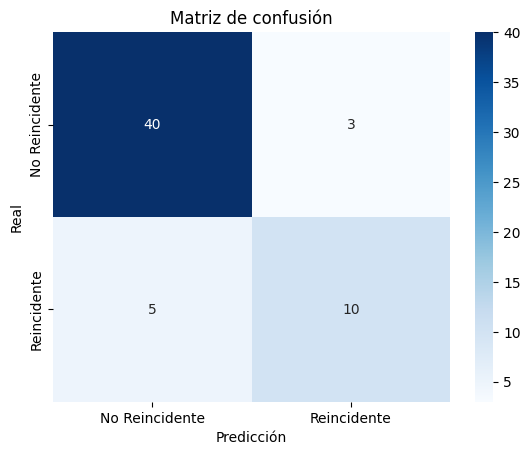

In [56]:

from sklearn.naive_bayes import GaussianNB

# Definir la cantidad de experimentos
nExperimentos =25

# DataFrame para almacenar resultados de Naive Bayes
columnas = ['ACC', 'PRECISION', 'RECALL', 'F1-SCORE']
resultadosNB = []

# Evaluar Naive Bayes
model_nb = GaussianNB()

pipeline = Pipeline([
    ('model', model_nb)  # Modelo de Naive Bayes
])


for idexp in range(nExperimentos):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model_nb.fit(X_train, y_train)
    y_pred = model_nb.predict(X_test)
    y_pred = transformarPrediccion(y_pred)
    ACC = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    resultadosNB.append([ACC, precision, recall, f1])
    

resultadosNB = np.array(resultadosNB).mean(axis=0)
print("Resultados Naive Bayes")
print("Accuracy:", resultadosNB[0])
print("Precision:", resultadosNB[1])
print("Recall:", resultadosNB[2])
print("F1 Score:", resultadosNB[3])

# Construcción de modelo Naive Bayes final
model_nb.fit(X, Y)
guardarModelo(model_nb, 'modeloNB')

# Evaluación y visualización Naive Bayes
y_pred = model_nb.predict(X_test)
y_pred = transformarPrediccion(y_pred)
dataframeFinalNB = pd.DataFrame({'real': y_test, 'predicción CLASE': y_pred})
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE)
accuracyModeloBase = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  
print('Verdaderos negativos:', tn, 'Falsos positivos:', fp, 'Falsos negativos:', fn, 'Verdaderos positivos:', tp)
cm = confusion_matrix(y_test, y_pred)  
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicción'); ax.set_ylabel('Real')
ax.set_title('Matriz de confusión'); 
labels = ['No Reincidente', 'Reincidente']
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

plt.savefig('bayes_con_transformacion.png')

plt.show()


<h3>FASE 5: Comparacion de Modelos<h3>

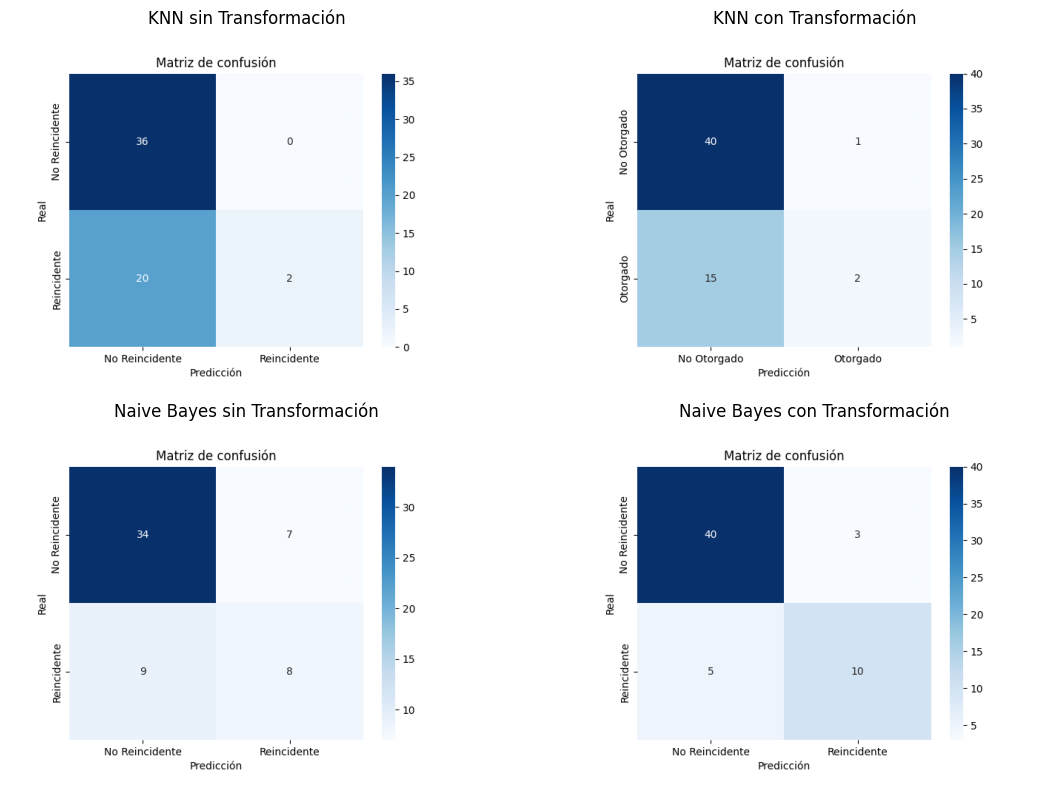

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes
img1 = mpimg.imread('matriz_confusion_knn_sin_transformacion.png')
img2 = mpimg.imread('matriz_confusion_knn_con_transformacion.png')
img3 = mpimg.imread('bayes_sin_transformacion.png')
img4 = mpimg.imread('bayes_con_transformacion.png')

# Crear una figura y un arreglo de subtramas 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Mostrar cada imagen en una subtrama correspondiente
axs[0, 0].imshow(img1)
axs[0, 0].set_title('KNN sin Transformación')
axs[0, 0].axis('off')  # Opcional: para ocultar los ejes

axs[0, 1].imshow(img2)
axs[0, 1].set_title('KNN con Transformación')
axs[0, 1].axis('off')  # Opcional: para ocultar los ejes

axs[1, 0].imshow(img3)
axs[1, 0].set_title('Naive Bayes sin Transformación')
axs[1, 0].axis('off')  # Opcional: para ocultar los ejes

axs[1, 1].imshow(img4)
axs[1, 1].set_title('Naive Bayes con Transformación')
axs[1, 1].axis('off')  # Opcional: para ocultar los ejes

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura con todas las subtramas
plt.show()


<h3>FASE 5.1: Comparacion de Modelos mediante Pipelines<h3>

In [87]:


# Función para guardar un modelo


# Cargar el archivo CSV con ';' como delimitador
dataframeNaiveTransformado = pd.read_csv('./data/dataframeSinTransformar.csv', delimiter=',')

# Separar las características y la etiqueta
Y = dataframeNaiveTransformado['CLASE']
X = dataframeNaiveTransformado.drop(['CLASE'], axis=1).values

# Definición de modelos
model_nb = GaussianNB()
model_knn = KNeighborsClassifier(n_neighbors=16)  # Ajusta los parámetros según sea necesario

# Pipelines para Naive Bayes
pipeline_nb_transformado = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización de las características
    ('model', model_nb)  # Modelo de Naive Bayes
])

pipeline_nb_sin_transformar = Pipeline([
    ('model', model_nb)  # Modelo de Naive Bayes sin transformación
])

# Pipelines para KNN
pipeline_knn_transformado = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización de las características
    ('model', model_knn)  # Modelo de KNN
])

pipeline_knn_sin_transformar = Pipeline([
    ('model', model_knn)  # Modelo de KNN sin transformación
])

import pandas as pd

# DataFrame para almacenar las métricas
metricas_globales = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

def evaluar_modelo(pipeline, X, Y, nombre):
    global metricas_globales
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred = transformarPrediccion(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Agregar las métricas al DataFrame global
    metricas_globales.loc[len(metricas_globales)] = [nombre, accuracy, precision, recall, f1]

# Evaluar y mostrar resultados
evaluar_modelo(pipeline_nb_transformado, X, Y, 'Naive Bayes con Transformación')
evaluar_modelo(pipeline_nb_sin_transformar, X, Y, 'Naive Bayes sin Transformación')
evaluar_modelo(pipeline_knn_transformado, X, Y, 'KNN con Transformación')
evaluar_modelo(pipeline_knn_sin_transformar, X, Y, 'KNN sin Transformación')

# Imprimir la tabla global de métricas
print("Tabla de Métricas Globales:")
metricas_globales.head()



Tabla de Métricas Globales:


,Modelo,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes con Transformación,0.810345,0.615385,0.571429,0.592593
1,Naive Bayes sin Transformación,0.689655,0.631579,0.521739,0.571429
2,KNN con Transformación,0.706897,0.625000,0.263158,0.370370
3,KNN sin Transformación,0.724138,0.571429,0.235294,0.333333


<h3>FASE 6: Fase de Predicción de Nuevos Samples</h3>

<h4><strong>Modelado KNN</strong><h4> 

Estas funciones y el método predecirReincidencia conforman un sistema para predecir la probabilidad de reincidencia en el cáncer de mama para un nuevo paciente, utilizando un modelo previamente entrenado y un pipeline de transformación de datos. El proceso comienza cargando el pipeline y el modelo entrenado desde archivos pickle. Luego, la función predecirNuevoCliente toma las características del nuevo paciente, las preprocesa utilizando el pipeline y realiza una predicción utilizando el modelo. Esta predicción se convierte en una etiqueta de clase ('No Reincidente' o 'Reincidente') junto con una certeza que representa la confianza asociada con la predicción. Finalmente, el resultado se devuelve como un DataFrame que muestra la predicción, la etiqueta de clase y la certeza asociada. Este sistema ofrece una herramienta útil para los profesionales de la salud al proporcionar información predictiva sobre la probabilidad de reincidencia en el cáncer de mama para nuevos pacientes.

In [59]:
#Se carga el pipeline de transformación
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

#Se carga el modelo entrenado
def cargarModelo(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

#Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    predicciones=lista
    marcas=[]
    certezas=[]
    nuevomax=1
    nuevomin=0
    marca=-1
    certeza=-1
    for i in range(len(lista)):
        prediccion=lista[i]
        if (prediccion < 0.5):
            marca = 'No Reincidente'
            maxa=0.5
            mina=0
            certeza=1-((prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin)
            certeza=str(int((certeza)*100))+'%'
        elif (prediccion >= 0.5):
            marca = 'Reincidente'
            maxa=1
            mina=0.5
            certeza=(prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin
            certeza=str(int((certeza)*100))+'%'
        marcas.append(marca)
        certezas.append(certeza)
    return prediccion, marcas, certezas

def predecirReincidencia( EDAD=1, TAMAÑOTUMOR=3, GANGLLINFATINVAS=2, GRADOMALIGNIDAD=2, MENOPAUSIA=2, GANGLINFATIEVALU=1, MAMA=1, CUADRANTESENO=3, IRRADIACION=1):    
    cnames=[ 'EDAD', 'TAMAÑOTUMOR', 'GANGLLINFATINVAS', 'GRADOMALIGNIDAD', 'MENOPAUSIA', 'GANGLINFATIEVALU', 'MAMA', 'CUADRANTESENO', 'IRRADIACION']
    Xnew=[ EDAD, TAMAÑOTUMOR, GANGLLINFATINVAS, GRADOMALIGNIDAD, MENOPAUSIA, GANGLINFATIEVALU, MAMA, CUADRANTESENO, IRRADIACION]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
    pipe=cargarPipeline("pipePreprocesadores")
    Xnew_Transformado=pipe.transform(Xnew_Dataframe)
    modelo=cargarModelo("modeloKNN")
    y_pred=modelo.predict(Xnew_Transformado)
    predicciones, marcas, certezas= obtenerResultadosyCertezas(y_pred)
    dataframeFinal=pd.DataFrame({'Predicción':predicciones, 'Resultado':marcas, 'Certeza': certezas})
    np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
    return dataframeFinal

dataframeFinal=predecirReincidencia()
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.44,No Reincidente,12%


In [60]:
dataframeFinal=predecirReincidencia(EDAD=1, TAMAÑOTUMOR=5, GANGLLINFATINVAS=2, GRADOMALIGNIDAD=1, MENOPAUSIA=1, GANGLINFATIEVALU=1, MAMA=1, CUADRANTESENO=3, IRRADIACION=1)
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.4,No Reincidente,19%


In [61]:
dataframeFinal=predecirReincidencia(EDAD=1, TAMAÑOTUMOR=9, GANGLLINFATINVAS=1, GRADOMALIGNIDAD=1, MENOPAUSIA=2, GANGLINFATIEVALU=2, MAMA=0, CUADRANTESENO=2, IRRADIACION=1)
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.48,No Reincidente,4%


<h4><strong>Modelado Naive Bayes</strong><h4> 

Estas funciones y el método predecirReincidenciaNaiveBayes conforman un sistema para predecir la probabilidad de reincidencia en el cáncer de mama para un nuevo paciente, utilizando un modelo previamente entrenado y un pipeline de transformación de datos pero para este caso seria Naive Bayes. Este proceso en cuanto al funcionamiento para predicciones KNN, no obstante cabe recalcar que es un sistema que se basa en probabilidad condicional

In [78]:
def predecirReincidenciaNaiveBayes(EDAD=2, TAMAÑOTUMOR=1, GANGLLINFATINVAS=0, GRADOMALIGNIDAD=2, MENOPAUSIA=1, GANGLINFATIEVALU=1, MAMA=1, CUADRANTESENO=1, IRRADIACION=1):
    cnames = ['EDAD', 'TAMAÑOTUMOR', 'GANGLLINFATINVAS', 'GRADOMALIGNIDAD', 'MENOPAUSIA', 'GANGLINFATIEVALU', 'MAMA', 'CUADRANTESENO', 'IRRADIACION']
    X_new = [[EDAD, TAMAÑOTUMOR, GANGLLINFATINVAS, GRADOMALIGNIDAD, MENOPAUSIA, GANGLINFATIEVALU, MAMA, CUADRANTESENO, IRRADIACION]]
    X_new_df = pd.DataFrame(data=X_new, columns=cnames)
    
    # Cargando el pipeline de preprocesamiento
    pipe = cargarPipeline("pipePreprocesadores")
    X_new_transformado = pipe.transform(X_new_df)
    
    # Cargando el modelo de Naive Bayes
    modelo = cargarModelo("modeloNB")
    
    # Realizando la predicción
    y_pred_proba = modelo.predict_proba(X_new_transformado)[:, 1]  # Probabilidad de clase positiva
    
    # Obtener resultados y certezas
    _, marcas, certezas = obtenerResultadosyCertezas(y_pred_proba)
    
    # Crear el DataFrame final
    dataframe_final = pd.DataFrame({'Predicción': y_pred_proba, 'Resultado': marcas, 'Certeza': certezas})
    
    return dataframe_final

# Realizar la predicción utilizando el modelo de Naive Bayes
dataframe_final_nb = predecirReincidenciaNaiveBayes()
dataframe_final_nb.head()


,Predicción,Resultado,Certeza
0,0.972857,Reincidente,94%


In [79]:
dataframe_final_nb = predecirReincidenciaNaiveBayes(EDAD=1, TAMAÑOTUMOR=2, GANGLLINFATINVAS=0, GRADOMALIGNIDAD=1, MENOPAUSIA=0, GANGLINFATIEVALU=0, MAMA=1, CUADRANTESENO=2, IRRADIACION=1)
dataframe_final_nb.head()


,Predicción,Resultado,Certeza
0,0.405734,No Reincidente,18%


En base a los parametros pasados se generan las predecciones respectivas en base al modelo previamente entrenado.

CONSLUSIONES:<br> 
Se realizo un análisis comparativo utilizando modelos de clasificación KNN y Naive Bayes con y sin estandarización de datos. Este estudio tenía como objetivo evaluar el impacto de la estandarización en el rendimiento de los modelos y determinar cuál de ellos ofrecía la mejor performance en términos de accuracy, precision, recall y F1 score. Los resultados revelaron que el modelo Naive Bayes con estandarización de datos fue el más efectivo, alcanzando la mayor precisión global (accuracy: 0.810345) y demostrando un equilibrio óptimo entre precision, recall y F1 score. La estandarización de los datos contribuyó significativamente a mejorar su rendimiento, permitiéndole adaptarse mejor a las características del conjunto de datos. En contraste, para el KNN, la estandarización tuvo un impacto mixto: si bien mejoró la precisión, se observó una disminución en el recall y el F1 score. Estos hallazgos resaltan la importancia de considerar cuidadosamente el preprocesamiento de datos y la selección de modelos en el análisis de aprendizaje automático, subrayando cómo la adecuada preparación de los datos puede influir en el rendimiento final del modelo.



Referencias:
* J. Antonio Aznar Casanova. (2023, 16 septiembre). Iniciación a las REDES BAYESIANAS (Parte-4) [Vídeo]. YouTube. https://www.youtube.com/watch?v=pN_HQBsi4CA
* Eraymond. (2023, 12 junio). INFERENCIA APROXIMADA y REDES BAYESIANAS | Procesado avanzado de señales y datos. https://blogs.upm.es/pasd/2023/06/12/blog/
* UCI Machine Learning Repository. (n.d.). Breast Cancer Wisconsin (Diagnostic) Data Set. Retrieved from https://archive.ics.uci.edu/dataset/14/breast+cancer
* W3Schools. (n.d.). Python Machine Learning - KNN. Retrieved from https://www.w3schools.com/python/python_ml_knn.asp
* Brownlee, J. (2021). How to Normalize and Standardize Time Series Data in Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/normalize-standardize-time-series-data-python/